In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime as dt
import matplotlib.dates as mdates
import numpy as np
from scipy.signal import argrelextrema

In [2]:
path = 'C:/Users/LENOVO/OneDrive/WaterSprint/ADB Project/DataSet Comparison/Modelled_Discharge/'

In [86]:
df = pd.read_excel(path+'Daily-streamflows-1990-2014_Final.xlsx',sheet_name = 'Kurram' )
df['date'] = pd.to_datetime(df['Time'])

In [87]:
df

,Time,TP,TS,KR1,KR2,KR3,KR4,KR5,KR6,KR7,date
0,1990-01-01,17.778867,26.117898,97.731544,31.074016,64.125382,25.077849,29.887128,2.393863,15.702669,1990-01-01
1,1990-01-02,17.046447,24.856439,91.121677,29.317797,59.495886,23.196135,28.159573,2.324772,15.123802,1990-01-02
2,1990-01-03,16.337649,23.799790,86.001928,27.844124,55.958869,21.732562,26.772436,2.219790,14.517748,1990-01-03
3,1990-01-04,47.021348,28.750461,333.704140,154.764766,133.664745,47.454684,36.469051,3.686432,35.908471,1990-01-04
4,1990-01-05,63.260109,43.729119,671.370854,276.013053,308.777581,79.142675,65.064627,5.267132,45.485449,1990-01-05
...,...,...,...,...,...,...,...,...,...,...,...
9126,2014-12-27,14.495332,21.695915,70.407147,22.557808,46.113264,18.295624,23.261927,2.105954,13.019265,2014-12-27
9127,2014-12-28,14.073182,21.318052,68.636503,22.155380,44.757002,17.343595,22.890829,2.054420,12.578066,2014-12-28
9128,2014-12-29,13.709196,20.705670,66.739356,21.676954,43.401856,16.640873,22.277209,1.990007,12.232936,2014-12-29
9129,2014-12-30,13.568439,20.245672,65.373438,21.446911,42.326856,16.191305,21.801084,1.948504,12.106935,2014-12-30


In [88]:
df1 = pd.read_excel(path+'Daily-streamflows-2025-2099.xlsx',sheet_name = 'Kurram' )
df1['date'] = pd.to_datetime(df1['Time'])

In [89]:
df1

,Time,TP_SSP245,TP_SSP585,TS_SSP245,TS_SSP585,KR1_SSP245,KR1_SSP585,KR2_SSP245,KR2_SSP585,KR3_SSP245,KR3_SSP585,KR4_SSP245,KR4_SSP585,KR5_SSP245,KR5_SSP585,KR6_SSP245,KR6_SSP585,KR7_SSP245,KR7_SSP585,date
0,2025-01-02,7.720971,7.720971,24.332057,24.332056,10.342760,10.342759,3.675772,3.675772,13.967559,13.967557,7.403267,7.403265,22.982430,22.982430,2.835885,2.835885,8.060366,8.060366,2025-01-02
1,2025-01-03,14.078586,14.079741,39.417025,39.479148,80.911557,81.036688,20.921019,20.940910,59.883236,59.997889,16.181571,16.184763,40.629426,40.689230,3.291214,3.291568,12.742945,12.743717,2025-01-03
2,2025-01-04,14.054018,14.080068,49.850980,50.228217,90.071258,90.880513,21.256928,21.444112,68.316050,68.981917,16.177064,16.202769,50.741295,51.109760,3.320844,3.322576,12.717907,12.740662,2025-01-04
3,2025-01-05,13.999051,14.012800,60.446238,60.944931,101.142221,102.127616,21.109715,21.348084,79.366677,80.099630,16.130138,16.154345,61.439541,61.937407,3.359792,3.378055,12.667135,12.677107,2025-01-05
4,2025-01-06,14.017154,14.012540,67.709320,68.138138,109.038076,109.706384,21.058551,21.149901,87.231279,87.772406,16.154066,16.191748,68.808268,69.239579,3.883746,3.93143,12.689829,12.684302,2025-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27369,2099-12-09,14.584455,15.435069,24.567753,28.458676,75.477164,82.470976,23.741635,24.929554,49.843903,55.646404,18.581870,20.291240,26.280048,30.220716,2.419982,2.797305,13.017242,13.783760,2099-12-09
27370,2099-12-10,14.561049,15.447288,24.306045,28.081501,75.018257,81.855973,23.723814,24.925732,49.412440,55.040885,18.394936,20.035780,26.015053,29.843300,2.413171,2.789063,12.986827,13.754074,2099-12-10
27371,2099-12-11,14.496549,15.352550,24.025459,27.682613,74.425333,81.068316,23.657896,24.838724,48.879064,54.324580,18.152340,19.724121,25.731387,29.442109,2.389875,2.761768,12.933493,13.682639,2099-12-11
27372,2099-12-12,14.463237,15.266033,23.757420,27.303636,73.751995,80.123950,23.550397,24.649713,48.322745,53.586400,17.937718,19.443254,25.451315,29.047022,2.355375,2.719983,12.875540,13.609121,2099-12-12


In [90]:
# start_date = '2010-07-01'
# end_date = '2010-08-31'
# df1 = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

In [91]:
# #creating a dataframe to plot scatter points on the same graph
# start_date = '2010-07-31'
# end_date = '2010-07-31'
# df2 = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

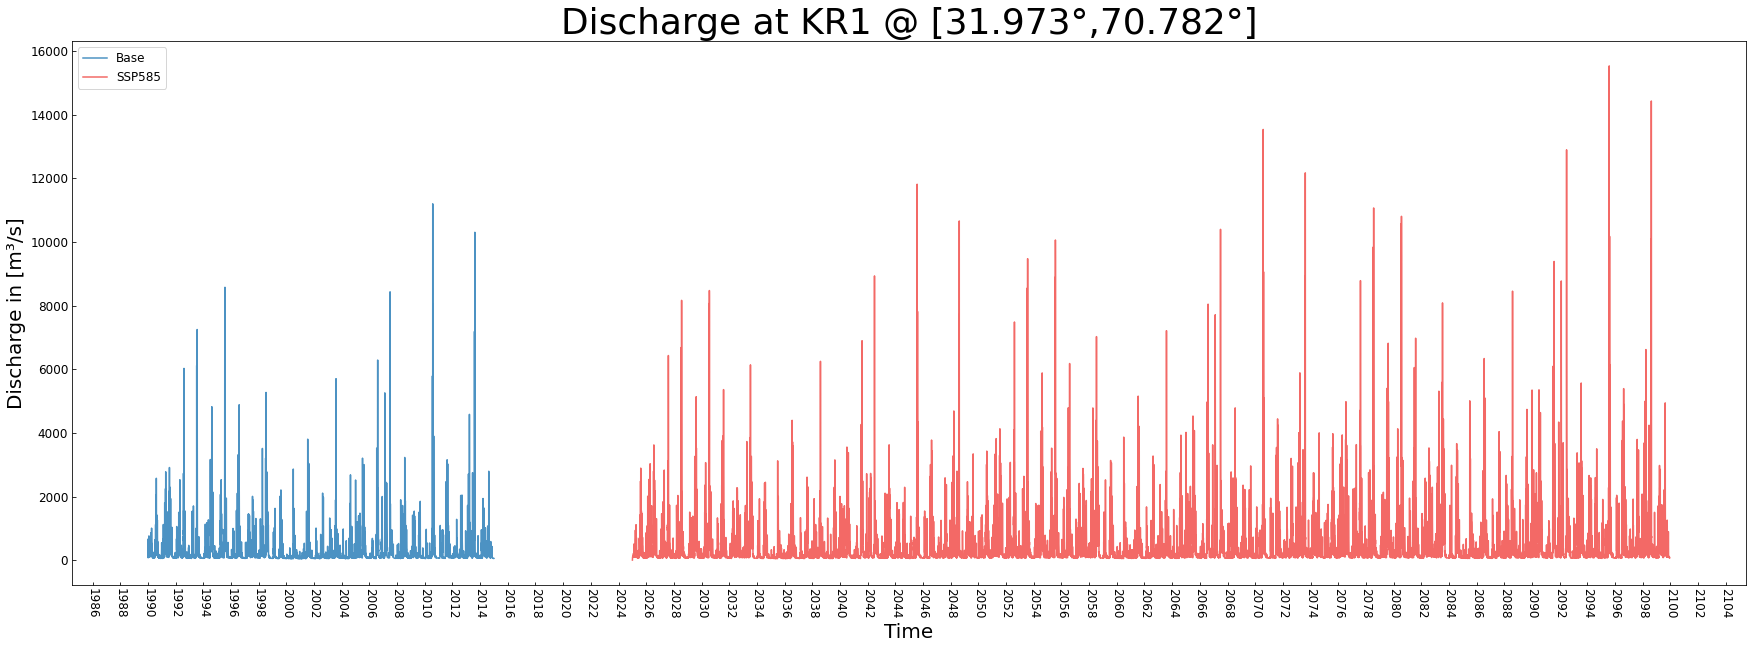

In [92]:

fig, axs = plt.subplots(figsize=(30, 10))

Point = 'KR1'
# RCP4 = 'KR1_SSP245'
RCP8 = 'KR1_SSP585'


axs.plot(df['date'],df[Point],color='#1f77b4',label='Base',alpha=0.8)      #red color code #f04440
# axs.plot(df1['date'],df1[RCP4],color='#1f77b4',label='SS245',alpha=0.8)      #red color code #f04440
axs.plot(df1['date'],df1[RCP8],color='#f04440',label='SSP585',alpha=0.8)      #red color code #f04440




# axs.plot(,df1['Observed_Cumecs'],label='Observed',color='black',alpha=0.6) # darkblue color code '#1f77b4'
# axs.plot(df1['KH2'],label='Wflow',color='#4474c6')      #red color code #f04440



axs.legend(loc='upper left',fontsize='12')
# axs.xaxis.set_major_formatter(date_fmt)


#Changes the number of xticks visible
# locator = mdates.AutoDateLocator(minticks=50,maxticks=10)
# locator = mdates.AutoDateLocator()

axs.tick_params(axis='x', labelsize=12,direction='in',rotation=-90)
axs.tick_params(axis='y', labelsize=12,direction='in')
# axs.set_yticks(range(0,110000, 10000))
axs.set_title('Discharge at '+Point+' @ [31.973°,70.782°]',fontsize='36')
axs.set_ylabel('Discharge in [m³/s]',fontsize='20')
axs.set_xlabel('Time',fontsize='20')

#Setting the number of x ticks, change the interval to increase or decrease number of dates
locator = mdates.YearLocator(2)
axs.xaxis.set_major_locator(locator)

In [83]:
fig.savefig(path+'/Future/SSP585/DK3.jpg')